# Insight: According to Australian Bureau of Statistics’ (ABS) National Survey of Mental Health and Wellbeing (SMHWB), around 26 percent of Australians aged 16–24 reported the symptoms of mental ill-health in the previous 12 months.



## Open source code for extracting a  data insight 

This Jupyter notebook demonstrates how to download and analyse the underlying data and extract information about Australia's mental health and well-being in 2007.

<img src="https://images.unsplash.com/photo-1516749712236-67f5688a642a?ixlib=rb-1.2.1&ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&auto=format&fit=crop&w=1350&q=80" width ="1200" height=600 >

<span style="font-style:italic;">Photo by <a href="https://unsplash.com/@neonbrand">NeONBRAND
</a> on <a href="https://unsplash.com/s/photos/mental-health?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Unsplash</a></span>


## The insight generation process is divided into sub-tasks as shown below:

1. Download data
2. Explore data
3. Extract/analyse data
4. Visualize data

## Step 1 : Download data

First, we download a copy of "*43260do001_2007.xls*" from Github (https://github.com/soda-lab/data-registry/) with python code. The data initially published from the 2007 National Survey of Mental Health and Wellbeing (SMHWB) by the Australian Bureau of Statistics (ABS) [1]. 

- **Australian Beureau of Statistics (ABS)**: ABS is a national statistical agency in Australia. It provides a huge range of statistical data on economic, population, environmental, and social issues. The ABS also operates the national Census of Population and Housing that occurs every five years.

- **SMHWB**: The 2007 National Survey of Mental Health and Wellbeing (SMHWB) was designed to provide lifetime prevalence estimates for mental disorders.

### Download data with python

In [1]:
import pandas as pd

repository = 'https://github.com/soda-lab/data-registry/'
path = 'blob/main/original_data/'
dataset = '43260do001_2007.xls'
raw = '?raw=ture'

url = repository + path + dataset + raw
xls = pd.ExcelFile(url)

In [2]:
print(xls.sheet_names)

['Contents', 'Table_1', 'Table_2', 'Table_3', 'Table_4', 'Table_5', 'Table_6', 'Table_7', 'Table_8', 'Table_9', 'Table_10', 'Table_11', 'Table_12', 'Table_13', 'Table_14', 'Table_15']


Data successfully loaded to the Jupyter notebook. The data includes 16 tables (see above list of tables).

## Step 2: Explore data

Before we start to extract insights from the data, we need to explore the data to identify potential insights. As you can see in the below screenshot, the "Contents" sheet contains brief information about the data tables.

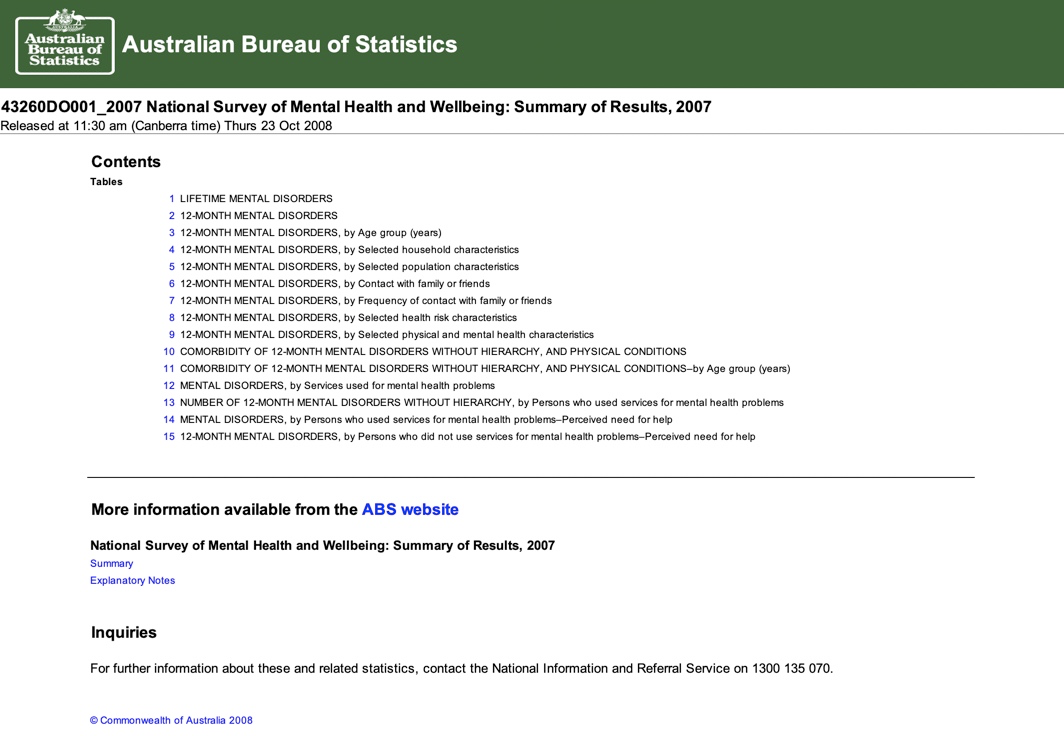

In [7]:
df3 = pd.read_excel(xls, sheet_name = 'Table_3', skiprows=4, header=0)
df3

,Unnamed: 0,Anxiety disorders,Unnamed: 2,Unnamed: 3,Unnamed: 4,Affective disorders,Unnamed: 6,Unnamed: 7,Unnamed: 8,Substance Use disorders,...,Unnamed: 15,Unnamed: 16,No 12-month mental disorder,Unnamed: 18,Unnamed: 19,Unnamed: 20,Total,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,NaN,Number,RSE of estimate,Proportion,RSE of proportion,Number,RSE of estimate,Proportion,RSE of proportion,Number,...,Proportion,RSE of proportion,Number,RSE of estimate,Proportion,RSE of proportion,Number,RSE of estimate,Proportion,RSE of proportion
1,NaN,'000,%,%,%,'000,%,%,%,'000,...,%,%,'000,%,%,%,'000,%,%,%
2,MALES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16–24,120.3,13.4,9.3,13.4,56.3,20.7,4.3,20.7,201,...,22.8,8.7,1003,2.6,77.2,2.6,1299.3,0,100,0
4,25–34,162.8,16.2,11.5,16.2,99,22.9,7,23,159.9,...,22.8,11.6,1091,3.4,77.2,3.4,1412.6,0.7,100,0
5,35–44,228.9,13.3,14.9,13.2,128.3,22.2,8.4,22.3,100.1,...,20.8,10.8,1215.5,2.9,79.2,2.8,1534.5,0.9,100,0
6,45–54,195.5,18.3,13.9,18.3,88.8,20,6.3,20,62,...,18.6,15.3,1143.4,3.5,81.4,3.5,1405.4,0.5,100,0
7,55–64,103,14.4,8.9,14.3,30.1,31,2.6,31.1,18.1,...,10.9,12.4,1032.3,1.8,89.1,1.5,1158.8,0.9,100,0
8,65–74,39.1,17.1,5.6,17.1,NaN,0,NaN,0,NaN,...,7.7,16.5,645.4,1.9,92.3,1.4,699.2,1.3,100,0
9,75–85,11,40.3,2.5,40.4,NaN,0,NaN,0,NaN,...,4.8,32.8,419.1,1.9,95.2,1.6,440,0.7,100,0


As you can see in the above table, table "Table_3" contains information about Australians' 12-month mental disorders by age group and gender. There are 6 super columns "Anxiety disorders", "Affective disorders", "Substance Use disorders", "Any 12-month mental disorder", "No 12-month mental disorder", and "Total" in the table. Each super column includes 4 sub columns "Number", "RSE of estimate", "Proportion", and "RSE of proportion". Meanwhile, rows represents different age groups and gender. 

## Step3: Extract/analyse data

As we interest in comparing the proportion of people with any 12-months mental disorder by gender and age groups, we'd like to extract "Any 12-month mental disorder" super column with "Proportion" sub-column and "PERSONS" rows with all age groups rows from the table. We also reformat the extracted columns and rows as it can be analysed and visualized. Below python code demonstrate how to extract and reformat data from the table.

In [8]:
extract_columns = ['Unnamed: 0', 'Unnamed: 15'] 
extract_rows = ['PERSONS']

In [14]:
extracted_df = pd.DataFrame(columns=['Unnamed: 0'])

rows_no = 0
for index, row in df3.iterrows():
    if rows_no > 0:
        extracted_df = extracted_df.append(row)
    if row['Unnamed: 0'] in extract_rows:
        rows_no = 7
    rows_no -= 1
    
extracted_df = extracted_df.dropna(subset=['Unnamed: 0'], how='all') # drop rows where it contains meaningless values
extracted_df = extracted_df[extract_columns]

extracted_df.rename(columns={"Unnamed: 0":"Person age groups",
                             "Unnamed: 15":"Person proportion(%)"}, inplace=True) #rename columns
extracted_df

,Person age groups,Person proportion(%)
21,16–24,26.4
22,25–34,24.8
23,35–44,23.3
24,45–54,21.5
25,55–64,13.6
26,65–74,8.6


As you can see the above table, we extract columns and rows from the "Table_3". According to the extracted table, 26.4% of Australian age between 16-24 reported symptoms of mental ill-health(disorder) in the 12 months. 

## Step4: Visualize data

Here, we'd like to visualize the extracted tables. Below cells show how to visualize the extracted data by using **Matplot** library.

- **Matplot** : Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python

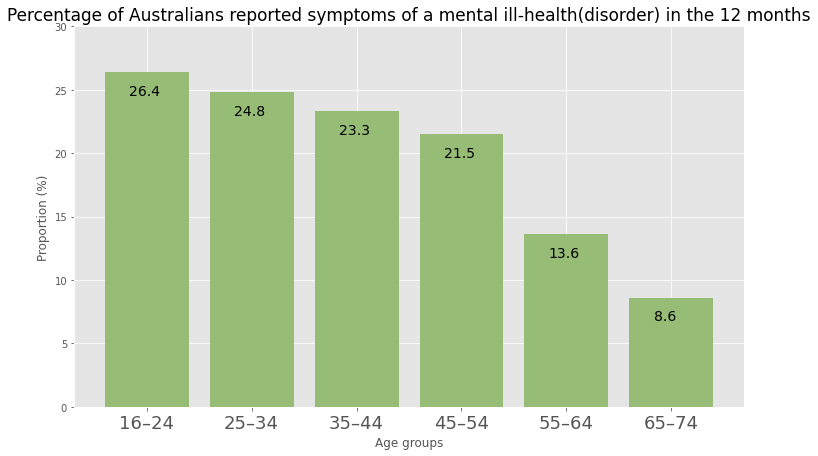

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

x = list(extracted_df['Person age groups'])
AVG_distances = list(extracted_df['Person proportion(%)'])

x_pos = [i for i, _ in enumerate(x)]
plt.figure(figsize=(12,7))
plt.bar(x_pos, AVG_distances, color='#96BC75')
plt.xlabel("Age groups", fontsize=12)
plt.ylabel("Proportion (%)", fontsize=12)
plt.title("Percentage of Australians reported symptoms of a mental ill-health(disorder) in the 12 months", fontsize=17)
plt.ylim((0, 30))   # set the ylim to bottom, top
for index, value in enumerate(AVG_distances):
    plt.text(index - 0.17, value - 1.8, str(round(value, 2)), fontsize=14)

plt.xticks(x_pos, x, fontsize=18)
plt.show()

As you can see from the figure, the proportion of Australians who reported symptoms of a mental ill-health is decrease by age groups. The age group "16-24" has the highest proportion (26.4%) while the age group "65-74" has the lowest proportion (8.6%). 

## Conclusion

In this Jupyter notebook, we demonstrated how to download a data from Github and explore the data by using python code. *2071.0.55.001 - Census of Population and Housing: Commuting to Work - More Stories from the Census, Commuting Distance by Personal Characteristics* contains information about Australian commuting distances in 2016. Python code were used to extract data tables from the data collection and visualize the tables. Eventually, we learned the data insight "**According to the Commuting Distance report from Australian Bureau of Statistics (ABS), the average commuting distance (to the workplace) was 16km in Australia in 2016**" from this activity. 


## References

[1] Australian Bureau of Statistics, National Survey of Mental Health and Wellbeing: summary of results, Australian Bureau of Statistics, 2008. [Dataset] Available:https://www.abs.gov.au/statistics/health/mental-health/national-survey-mental-health-and-wellbeing-summary-results/2007. [Accessed: January 4, 2021].